In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as smf
import scipy.stats 
from scipy import stats

In [2]:
start_date= '2022-01-01'
end_date="2023-04-01"
tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA"]

ticker=["TSLA"]

In [3]:
def data_returns(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"].pct_change()).dropna())
       
    return returns

In [4]:
dat=data_returns(["BABA"],start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
#data=np.random.normal(0,1,1000)


In [6]:
def distribution_fit(data):
 from sklearn.metrics import r2_score
 y, x = np.histogram(data, bins=100, density=True)
 x = (x + np.roll(x, -1))[:-1] / 2.0
 list_loi = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2','rayleigh',"logistic","genextreme","weibull_max"]
 sse=[]
 rsq=[]
 best_distribution=[]

 for  i  in  range(len(list_loi)) :
    #modélisation
    loi=getattr(scipy.stats, list_loi[i])
    loi_fit=loi.fit(data)

    #parametres
    loc= loi_fit[-2]
    scale=loi_fit[-1]
    arg=loi_fit[:-2]

    #pdf
    pdf=loi.pdf(x, loc=loc,scale=scale, *arg)

    #Rmse
    sse=np.sum((y-pdf)**2)
    #R_squared
    rsq=round(r2_score(y,pdf),2)
    best_distribution.append([loi,loi_fit,sse,rsq,list_loi[i]])

 return sorted(best_distribution, key=lambda x:x[2])
 


In [7]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [8]:
def parm(modele):
    return [modele[-1], modele[1]]


In [9]:
def ks_test(modele,title):
    kstest=pd.DataFrame()

    for i in range(len(modele)):
       kstest[modele[i][-1]]=stats.kstest(title, modele[i][-1] ,args=(modele[i][1]))
    return kstest





In [10]:
distribution_fit(dat)[0]

tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA"]
tech=data_returns(tickers,"2023-01-01","2023-04-01")

stats.kstest(tech["GC=F"],'t',args=( (3.0295110611565326, 0.0009095407238531756, 0.006570758729865104)))


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KstestResult(statistic=0.0631698268410228, pvalue=0.9552568979876569)

In [11]:
ks_test(distribution_fit(tech["GC=F"]),tech["GC=F"])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


,t,logistic,lognorm,gamma,beta,norm,alpha,loggamma,invgamma,invgauss,genextreme,rayleigh,pareto,chi,chi2,weibull_max
0,0.063170,0.081347,0.110523,0.111585,0.110469,0.111335,0.120279,0.111773,0.120024,0.133328,0.120995,0.282876,4.099947e-01,5.032771e-01,4.943229e-01,4.920619e-01
1,0.955257,0.783945,0.415450,0.403664,0.416060,0.406423,0.315004,0.401607,0.317395,0.208780,0.308341,0.000082,8.693129e-10,7.954771e-15,2.759167e-14,3.759885e-14


In [12]:
stats.kstest(tech["GC=F"],'t',args=( (3.0295110611565326, 0.0009095407238531756, 0.006570758729865104)))

KstestResult(statistic=0.0631698268410228, pvalue=0.9552568979876569)

In [13]:

distribution_fit(tech["GC=F"])[0]

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


 (3.0295110611565326, 0.0009095407238531756, 0.006570758729865104),
 62502.61164090412,
 0.33,
 't']

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: inva

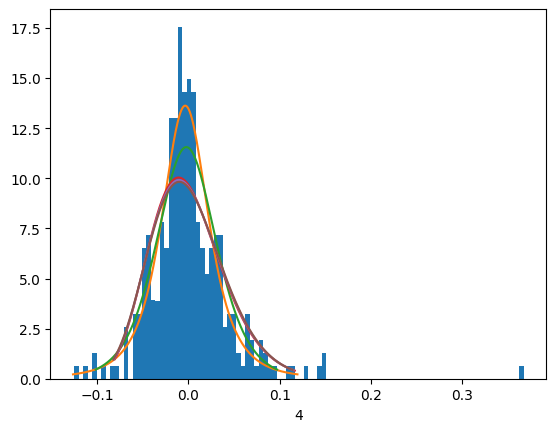

In [14]:
y, x = np.histogram(dat, bins=10000, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

plt.hist(dat, bins=100, density=True)
for i in range(5):
   pdf_=make_pdf(distribution_fit(dat)[i][0],distribution_fit(dat)[i][1])
   plt.plot(pdf_)
   plt.xlabel(i)
plt.show()

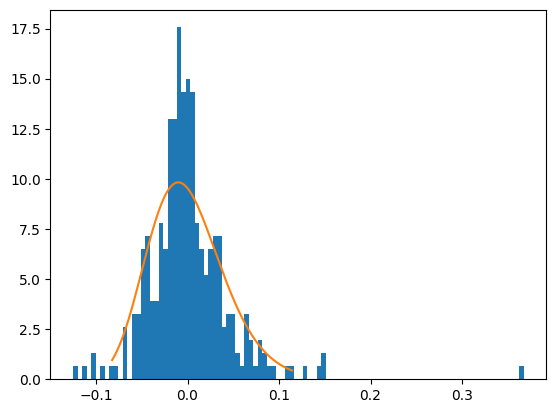

In [15]:
y, x = np.histogram(dat, bins=10000, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

plt.hist(dat, bins=100, density=True)
#plt.plot(x,y)
plt.plot(pdf_)


In [21]:
def generate_distribution(dist, params, size=10):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    return dist.rvs(loc=loc, *arg,scale=scale, size=size ) if arg else dist.rvs(loc=loc, scale=scale, size=size)

generate_distribution(distribution_fit(dat)[0][0],distribution_fit(dat)[0][1])


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: inva

array([ 0.00039981, -0.03438664,  0.00858235,  0.02066473, -0.00193772,
        0.00952918,  0.01195423, -0.03718589,  0.03663622, -0.0330978 ])